# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [2]:
car_mpg_df = pd.read_csv("cars-mpg-project.csv")

# Check info, shape, and data types

In [3]:
car_mpg_df.shape

(398, 9)

In [4]:
car_mpg_df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [5]:
car_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
car_mpg_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Check for missing values 

In [104]:
car_mpg_df["hp"].unique() # has a ? below as missing values

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

# Impute missing values with the median

In [4]:
car_name = car_mpg_df['car_name'] 
car_mpg_df = car_mpg_df.drop('car_name', axis=1) # drop car name

In [5]:
car_mpg_df = car_mpg_df.replace('?', np.nan)
car_mpg_df = car_mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

# converting the hp column from object / string type to float
car_mpg_df['hp'] = car_mpg_df['hp'].astype('float64')  

In [6]:
car_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# Check for unique values and their frequency for categorical columns

In [5]:
car_mpg_df.cyl.unique() # unique values for cylinder column

array([8, 4, 6, 3, 5], dtype=int64)

<AxesSubplot:xlabel='cyl', ylabel='count'>

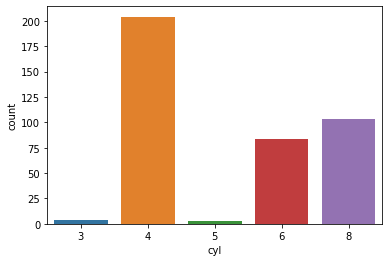

In [24]:
sns.countplot(x=car_mpg_df["cyl"], data=car_mpg_df)

In [21]:
car_mpg_df.origin.unique() # unique values for origin column

array([1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='origin', ylabel='count'>

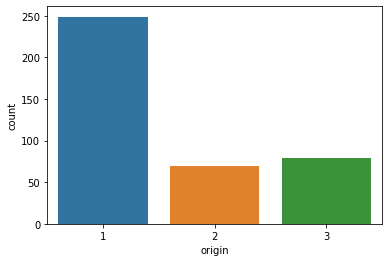

In [25]:
sns.countplot(x=car_mpg_df["origin"], data=car_mpg_df)

# Use visualization techniques to derive insights from the data

# Do univariate analysis by plotting histograms, countplot, distplot, etc as required

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acc', ylabel='Density'>

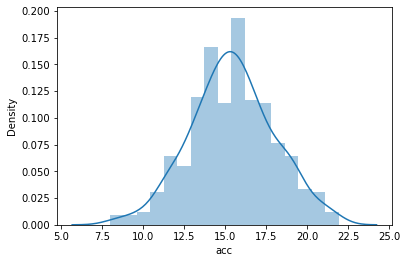

In [22]:
sns.distplot(car_mpg_df["acc"])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='disp', ylabel='Density'>

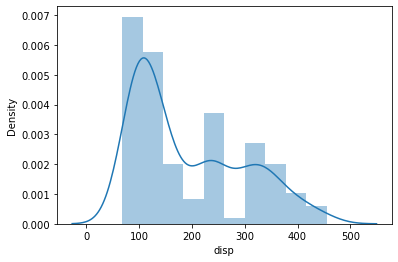

In [55]:
sns.distplot(car_mpg_df["disp"])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wt', ylabel='Density'>

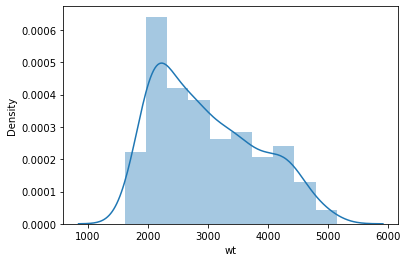

In [54]:
sns.distplot(car_mpg_df["wt"])

<AxesSubplot:xlabel='yr', ylabel='count'>

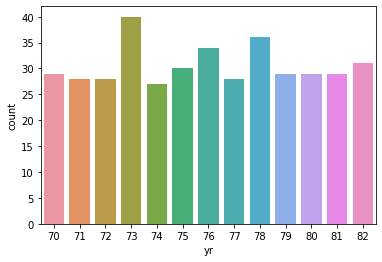

In [10]:
sns.countplot(x=car_mpg_df["yr"])

# Check correlation in the data. Plot heatmap to visualize correlation between different variables

In [11]:
car_mpg_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

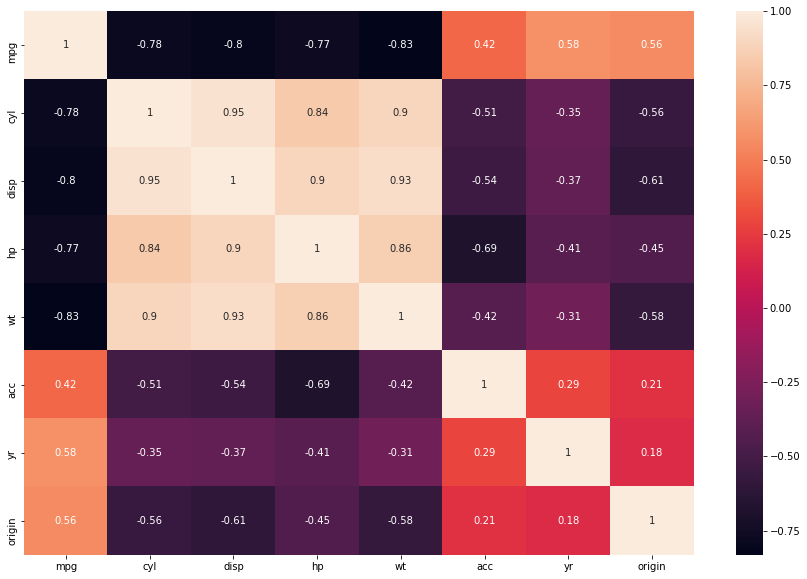

In [12]:
plt.subplots(figsize=(15,10))
sns.heatmap(car_mpg_df.corr(), annot=True)

# Use pairplot for bivariate analysis. Write about distribution of independent and dependent variables.

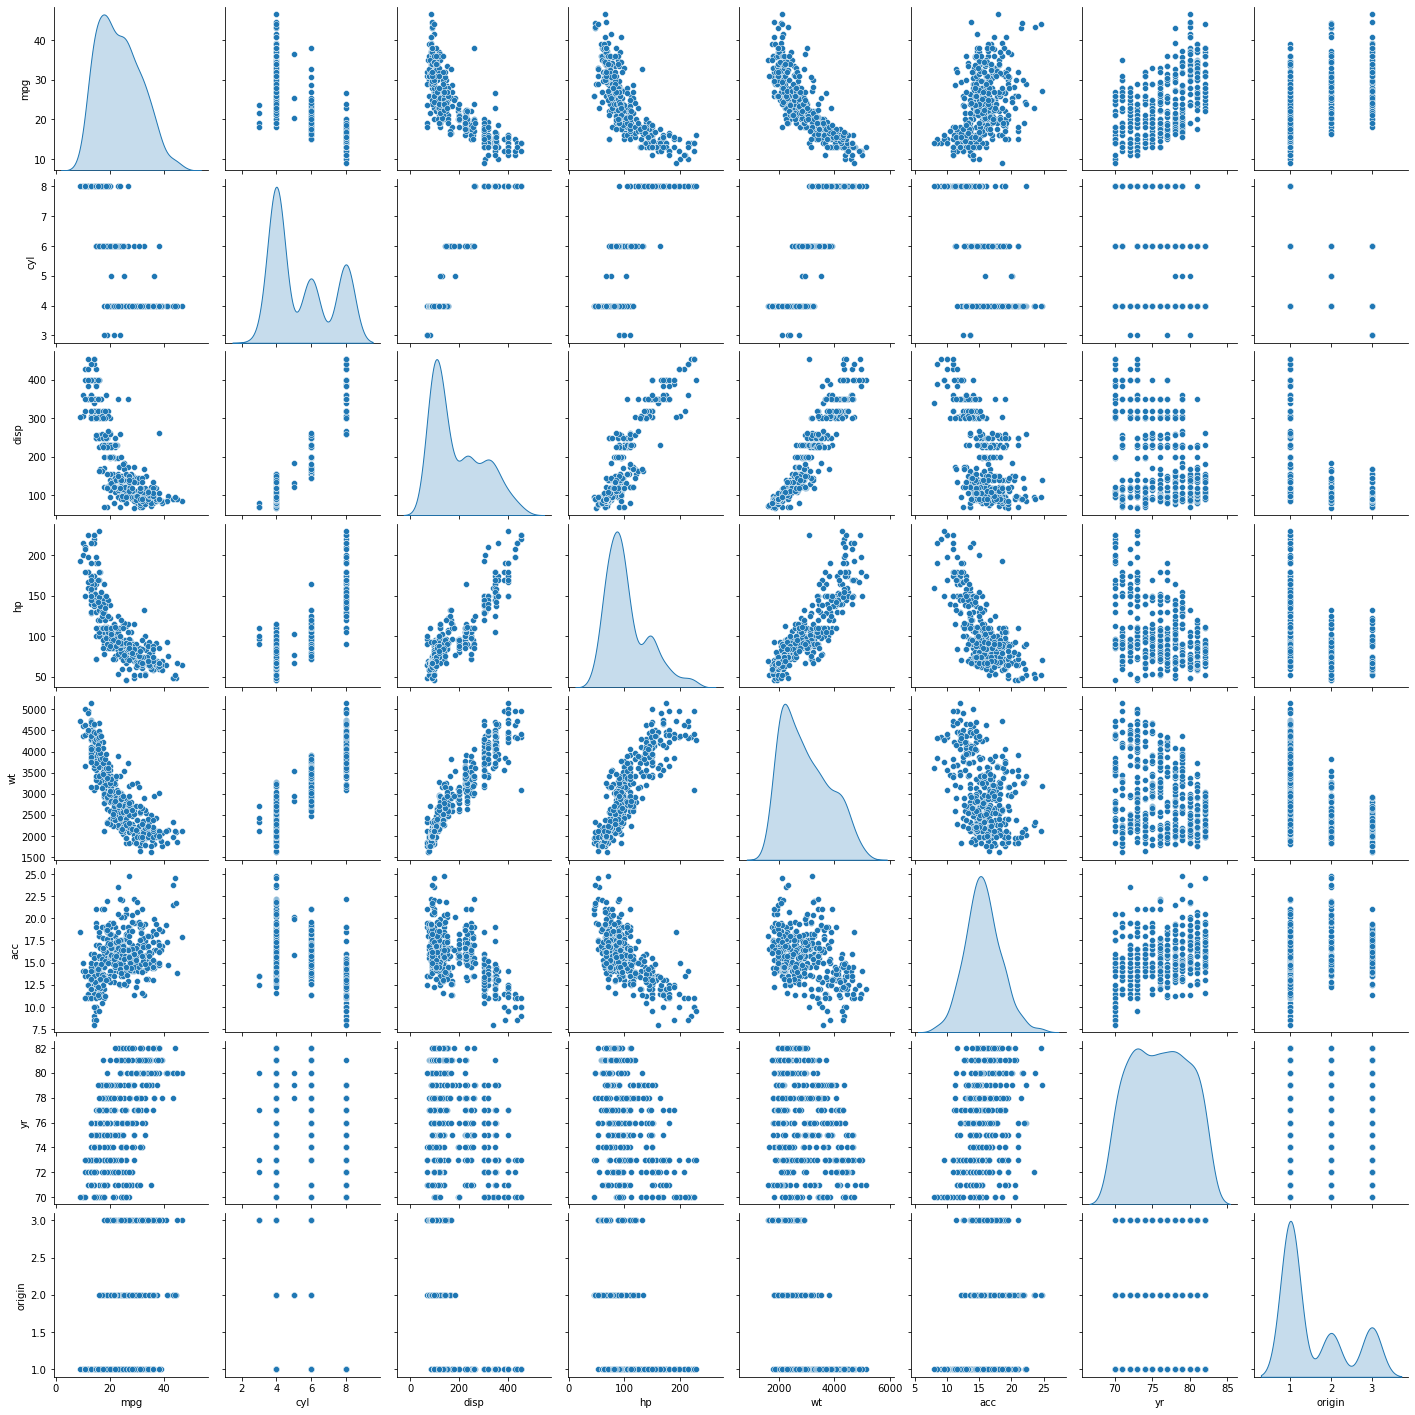

In [13]:
sns.pairplot(car_mpg_df, diag_kind='kde')

# Conclusion: Miles per Gallon has a strong negative corelation with no. of cylinders, displacement, weight and horse power. No. of cylinders, displacement, weight and horse power all have a strong positive co-relation amongst themselves.

# Check for outliers using box plots and treat them if required

<AxesSubplot:>

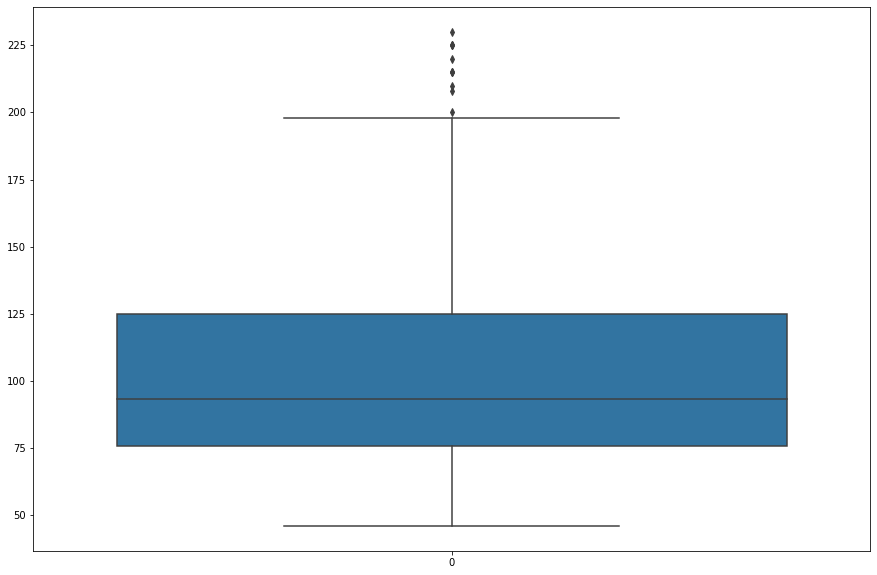

In [108]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=car_mpg_df["hp"]) # horse power column has outliers

In [7]:
# replace outliers with mode
car_mpg_df['hp'] = np.where(car_mpg_df['hp'] > 200, car_mpg_df['hp'].mode(), car_mpg_df['hp']) 

<AxesSubplot:>

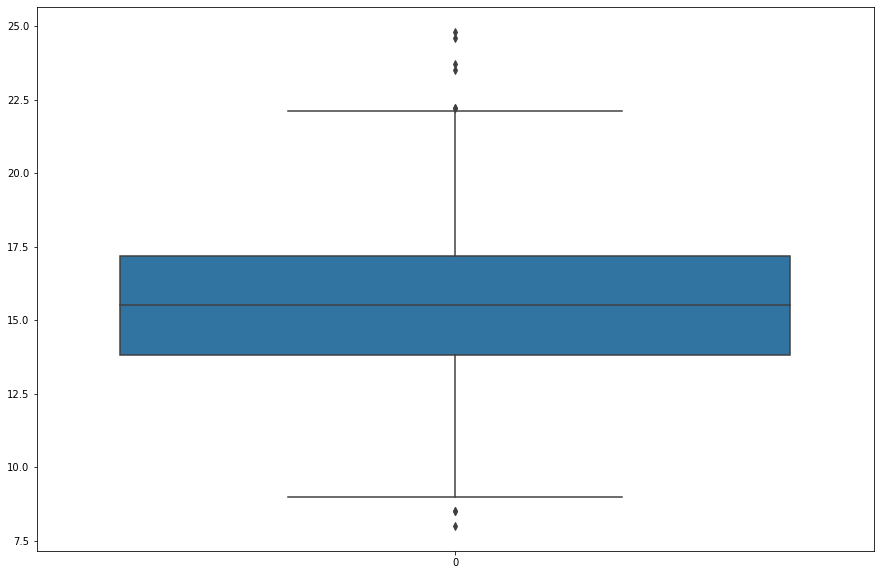

In [110]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=car_mpg_df["acc"]) # acceleration column has outliers

In [8]:
# replace outliers with mode
car_mpg_df['acc'] = np.where(car_mpg_df['acc'] > 22, car_mpg_df['acc'].mode(), car_mpg_df['acc'])

# Identify and separate the data into different clusters

# Use Machine Learning algorithms like K Means or Hierarchical clustering to find out the optimal number of clusters in the data.

In [9]:
# Apply zscore for scalar transformation

from scipy.stats import zscore
car_mpg_df = car_mpg_df.apply(zscore)

In [170]:
# Two separate dataframes for kMeans and Hierarchical Agglomerative clustering
car_mpg_kmeans_df = car_mpg_df
car_mpg_hier_df = car_mpg_df

# Apply kMeans clustering

Text(0.5, 1.0, 'Selecting No. of clusters with the Elbow Method')

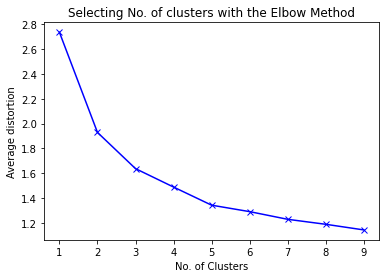

In [171]:
from sklearn.cluster import KMeans

# Finding optimal no. of clusters

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_mpg_kmeans_df)
    prediction=model.predict(car_mpg_kmeans_df)
    meanDistortions.append(sum(np.min(cdist(car_mpg_kmeans_df, model.cluster_centers_, 'euclidean'), axis=1)) / car_mpg_kmeans_df.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Average distortion')
plt.title('Selecting No. of clusters with the Elbow Method')

In [172]:
# Optimum solution is to use no. of clusters as 3, as beyond 3 clusters, the drop in average / mean distortion is minimal / very less

final_model = KMeans(3)
final_model.fit(car_mpg_kmeans_df)
prediction = final_model.predict(car_mpg_kmeans_df)

#Append the prediction 

car_mpg_kmeans_df["group"] = prediction
car_mpg_kmeans_df.groupby(["group"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
group,,,,,,,,
0,85,85,85,85,85,85,85,85
1,219,219,219,219,219,219,219,219
2,94,94,94,94,94,94,94,94


# Apply Hierachical Agglomerative clustering

In [173]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(car_mpg_hier_df)
car_mpg_hier_df['group'] = model.labels_
car_mpg_hier_df.groupby(["group"]).count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
group,,,,,,,,
0,219,219,219,219,219,219,219,219
1,94,94,94,94,94,94,94,94
2,85,85,85,85,85,85,85,85


In [174]:
# Finding the cophenet index

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

Z = linkage(car_mpg_hier_df, 'average')
c, coph_dists = cophenet(Z , pdist(car_mpg_hier_df))
c

0.7897281317292382

# Answer below questions based on outcomes of using ML based methods

# Mention how many optimal clusters are there in the data and what could be the possible reason behind it

# Conclusion: In case of Hierarchical clustering the value of c (cophenet index) is highest when the number of clusters is 3. As seen above, the number of optimal clusters is coming out to be same, i.e. 3 for both kMeans and Agglomerative clustering. So it can be concluded, that the optimal mumber of clusters in the dataset is 3

# Use linear regression model on different clusters separately and print the coefficients of the models individually

In [202]:
car_mpg_first_group = car_mpg_kmeans_df[car_mpg_kmeans_df["group"] == 0]
car_mpg_first_group = car_mpg_first_group.drop('group', axis=1)

car_mpg_second_group = car_mpg_kmeans_df[car_mpg_kmeans_df["group"] == 1]
car_mpg_second_group = car_mpg_second_group.drop('group', axis=1)

car_mpg_third_group = car_mpg_kmeans_df[car_mpg_kmeans_df["group"] == 2]
car_mpg_third_group = car_mpg_third_group.drop('group', axis=1)

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Linear Regression on the first group

In [199]:
X_first = car_mpg_first_group.drop('mpg', axis=1)
y_first = car_mpg_first_group[['mpg']]
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X_first, y_first, test_size=0.30, random_state=1)
regression_model_first = LinearRegression()
regression_model_first.fit(X_train_first, y_train_first)
regression_model_first.score(X_test_first, y_test_first)

0.6689604852756894

In [181]:
regression_model_first.coef_

array([[ 0.28258853,  0.04715011, -0.36926158, -0.76149429,  0.00605055,
         0.42103755,  0.08309872]])

# Linear regression on the second group

In [201]:
X_second = car_mpg_second_group.drop('mpg', axis=1)
y_second = car_mpg_second_group[['mpg']]
X_train_second, X_test_second, y_train_second, y_test_second = train_test_split(X_second, y_second, test_size=0.30, random_state=1)
regression_model_second = LinearRegression()
regression_model_second.fit(X_train_second, y_train_second)
regression_model_second.score(X_test_second, y_test_second)

0.403486388294407

In [187]:
regression_model_second.coef_

array([[ 0.03222267, -0.16449214, -0.10698817, -0.10117204, -0.18558566,
         0.18427228, -0.01611134]])

# Linear regression on the third group

In [197]:
X_third = car_mpg_third_group.drop('mpg', axis=1)
y_third = car_mpg_third_group[['mpg']]
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(X_third, y_third, test_size=0.30, random_state=42)
regression_model_third = LinearRegression()
regression_model_third.fit(X_train_third, y_train_third)
regression_model_third.score(X_test_third, y_test_third)

0.21706352069620305

In [189]:
regression_model_third.coef_

array([[ 0.34579426, -0.44465819,  0.02962035, -0.27812958, -0.07087336,
         0.16152287, -0.53292801]])

# How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

# Linear regression on the unified dataset

In [208]:
car_mpg_nogroup = car_mpg_kmeans_df.drop('group', axis=1)

In [207]:
X_nogroup = car_mpg_nogroup.drop('mpg', axis=1)
y_nogroup = car_mpg_nogroup[['mpg']]
X_train_nogroup, X_test_nogroup, y_train_nogroup, y_test_nogroup = train_test_split(X_nogroup, y_nogroup, test_size=0.30, random_state=1)
regression_model_nogroup = LinearRegression()
regression_model_nogroup.fit(X_train_nogroup, y_train_nogroup)
regression_model_nogroup.score(X_test_nogroup, y_test_nogroup)

0.8431383938914374

# Conclusion: As seen above, the linear regression model has a much better accuracy score of 84%, compared to the 3 individual cluster group scores of 66%, 40% and 21%. So in this case, applying linear regression on individual cluster degrades the performance compared to applying it on unified dataset.